# CoverType ML project (Part 2: Logistic Regression)

This is a MachineLearning project for predicting the forest types of forest, the data can be retreived from UC Irvine Machine Learning Repository:  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/

In this project, I have tried a series of preprocessing tools and modeled different classification models. There are validation of each model at the end of each project. So far the project have three different models that is tested: KNN, Logistic Regression and Random Forest)

Data set overall description:
* m X n = 581,012 X 55 Key features including: Elevation, Aspect, Slope etc. The last column is the cover_type classification from 1 to 7.
* For detail explaination of the variables, please check here: https://archive.ics.uci.edu/ml/datasets/covertype

## 1.Data statistics
To have a first glance at the whole data set

In [5]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("covtype.csv")

print(dataset.shape)

(581012, 55)


Use dataframe.describe() to have a better understanding of each feature, from this we can see the variable has any null or constant data.

In [43]:
#show all describes
pandas.set_option('display.max_columns', None)
print(dataset.describe())

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

Learning: 
* All rows can be used since there's no missing attribute(count for each attributes equals the total row number)
* According to standard deviation, there is no constant columns, we can assume all attributes are useful as far

**************************************************************************************************************************

## 2. Data Interaction

### 2.1 Correlation: 
Find the attributes that have high correlation with each other, the threshold I set was 0.5 this time. 

In [20]:
#Select only continous data(exclude Wilderness_Area and Soil_Type,because they are dummy coloumns)
continous_data = dataset.iloc[:,:10]

#get the names of all the columns
cols=continous_data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = continous_data.corr()

#list to store pairs that corr is over 0.5
corr_list = []

#store correlation and columns index
for i in range(0,10): 
    for j in range(i+1,10): #avoid repetition
        if (data_corr.iloc[i,j] >= 0.5 and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -0.5):
            corr_list.append([np.abs(data_corr.iloc[i,j]),i,j]) 
            
for v,i,j in corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Aspect and Hillshade_9am = 0.58
Aspect and Hillshade_3pm = 0.65
Slope and Hillshade_Noon = 0.53
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_9am and Hillshade_3pm = 0.78
Hillshade_Noon and Hillshade_3pm = 0.59


### 2.2 Scatter Plot visulization: 
Scatter plot of only the highly correlated pairs

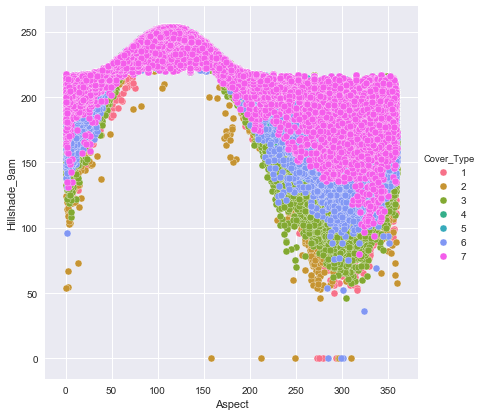

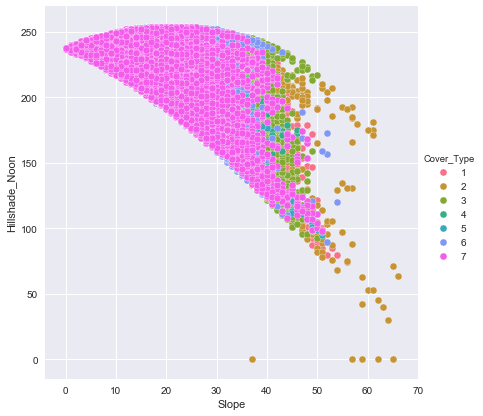

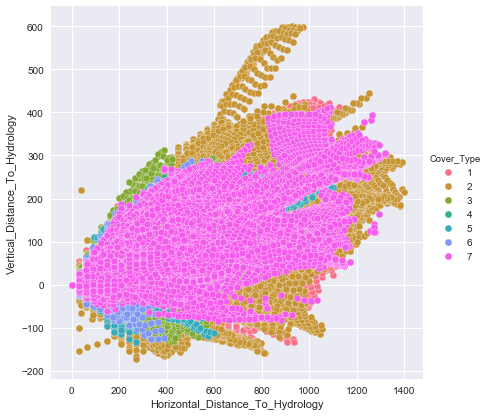

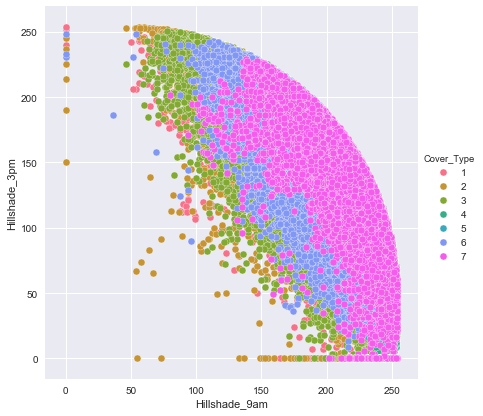

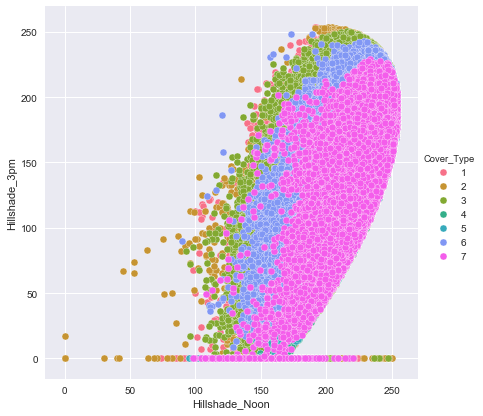

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

for v,i,j in corr_list:
    sns.pairplot(dataset, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()


## 3. Preprocessing Data

In [6]:
from sklearn import cross_validation

#Extract only the values
array = dataset.values

#Y is the target column, X has the rest
X = array[:,0:54]
Y = array[:,54]

#Validation chuck size 
val_size = 0.1

#Split the data into chunks
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=None)

In [23]:
from sklearn.preprocessing import StandardScaler

#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train[:,0:10])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:10])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,10:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,10:]),axis=1)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


**************************************************************************************************************************
The code belowed is to validation the model with PCA to decrease dimension, However, no evidence shows that reduction of variables contributes to either processing time or accuaracy rate.

In [9]:
'''
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

X_train_after = PCA(n_components = 5).fit_transform(X_train)
X_val_after = PCA(n_components= 5).fit_transform(X_val)

C_list = [1,5,10]

for c in C_list:
    start_time = time.time()
    model = LogisticRegression(n_jobs=-1)
    model.fit(X_train_after,Y_train)
    predict = model.predict(X_val_after)
    t = time.time() - start_time
    print("Processing time is %s seconds" % t)
    a = accuracy_score(Y_val, predict)
    print("Accuracy for %s is %0.5f "%(c,a))
    '''

Processing time is 44.35377359390259 seconds
Accuracy for 1 is 0.64989 
Processing time is 42.7296416759491 seconds
Accuracy for 5 is 0.64989 
Processing time is 48.91349458694458 seconds
Accuracy for 10 is 0.64989 


**************************************************************************************************************************

## 4. Prediction
The data is already pretty clean and tidy so far at this stage, we can try to use it for trainning models. At this file we will use logistic regression. 

In [25]:
#import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# parameter C is the the inverse of regularization strength in Logistic Regression
C_list = [1,5,10]

for c in C_list:
    #start_time = time.time()
    model = LogisticRegression(n_jobs=-1,C=c)
    model.fit(X_con,Y_train)
    predict = model.predict(X_val_con)
    #t = time.time() - start_time
    #print("Processing time is %s seconds" % t)
    a = accuracy_score(Y_val, predict)
    print("Accuracy for %s is %0.5f "%(c,a))

Accuracy for 1 is 0.71070 
Accuracy for 5 is 0.71077 
Accuracy for 10 is 0.71077 


In [27]:
#Table of the confusion matrix
y_true = pd.Series(Y_val)
y_pred = pd.Series(predict)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      1      2     3    4   5    6     7    All
True                                                    
1          14472   6429    20    0   2    0   398  21321
2           5024  22528   632    1  27   49    37  28298
3              0    390  2985   32   0  153     0   3560
4              0      0   128   88   0   27     0    243
5             14    836    73    0   8    0     0    931
6              0    604   926    6   1  168     0   1705
7            969     18     9    0   0    0  1048   2044
All        20479  30805  4773  127  38  397  1483  58102

We can see that although the overall accuaracy is not bad (71%), the model is bad at predicting some of the classes(eg,for class 6 the accuracy is only 42%)
****************************************************

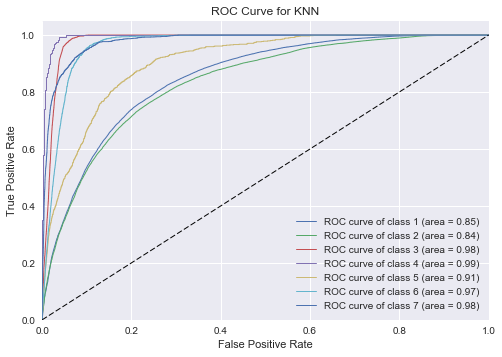

In [30]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

classifier = OneVsRestClassifier(model)
predicted_prob = classifier.fit(X_con, Y_train).predict_proba(X_val_con)

accurate_y = label_binarize(Y_val, classes=[1,2,3,4,5,6,7])
n_classes = accurate_y.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n_classes):
    fpr[i], tpr[i], _ = roc_curve(accurate_y[:,i], predicted_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=1
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()